# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.rename(columns={"Annual Income (k$)" : "income$", "Spending Score (1-100)" : "SpendingScore" }, inplace= True)

In [5]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
income$,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
SpendingScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
df["income$"] = df["income$"] * 1000

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
income$,200.0,60560.00,26264.721165,15000.0,41500.00,61500.0,78000.00,137000.0
SpendingScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
df.drop(columns="CustomerID", inplace=True)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [10]:
df.drop(columns="Gender").corr()


,Age,income$,SpendingScore
Age,1.000000,-0.012398,-0.327227
income$,-0.012398,1.000000,0.009903
SpendingScore,-0.327227,0.009903,1.000000


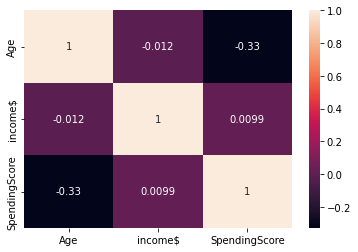

In [11]:
sns.heatmap(df.drop(columns="Gender").corr(), annot=True);

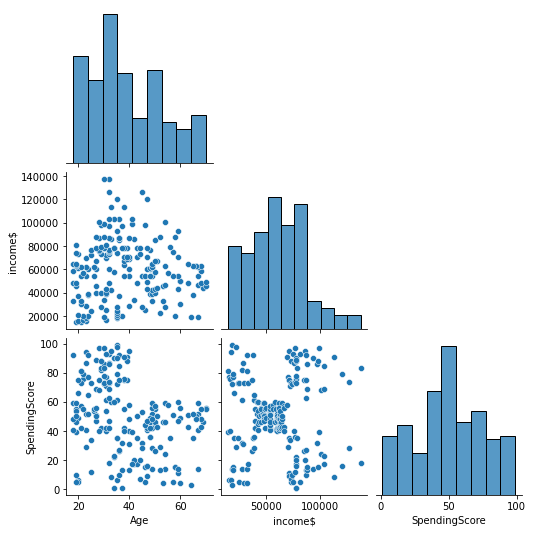

In [12]:
sns.pairplot(data=df, corner=True);

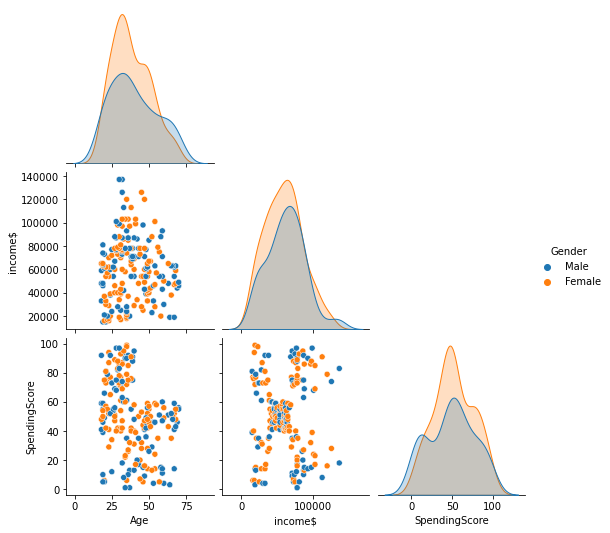

In [13]:
sns.pairplot(data=df, corner=True, hue="Gender");

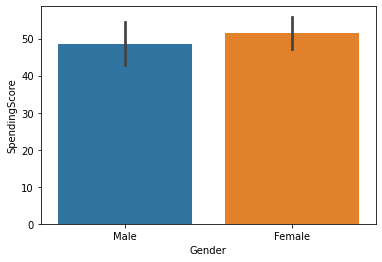

In [14]:
sns.barplot(data=df, y="SpendingScore", x = "Gender");

---
---

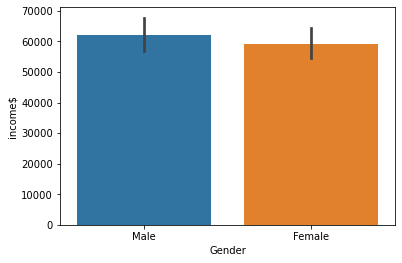

In [15]:
sns.barplot(data=df, y="income$", x = "Gender");

## Scaling

In [16]:
df.Gender = df.Gender.map({"Male" : 1, "Female" : 0 })
df.Gender.value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [18]:
# !pip install pyclustertend

In [19]:
from pyclustertend import hopkins

In [20]:
hopkins(df_scaled, df.shape[0])

0.26023076475555335

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [21]:
X = df_scaled
K_means_model = KMeans(n_clusters=2, random_state=42)

In [22]:
K_means_model.fit_predict(X)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [23]:
df["Clusters"] = K_means_model.labels_
df

,Gender,Age,income$,SpendingScore,Clusters
0,1,19,15000,39,1
1,1,21,15000,81,1
2,0,20,16000,6,0
3,0,23,16000,77,1
4,0,31,17000,40,1
...,...,...,...,...,...
195,0,35,120000,79,1
196,0,45,126000,28,0
197,1,32,126000,74,1
198,1,32,137000,18,0


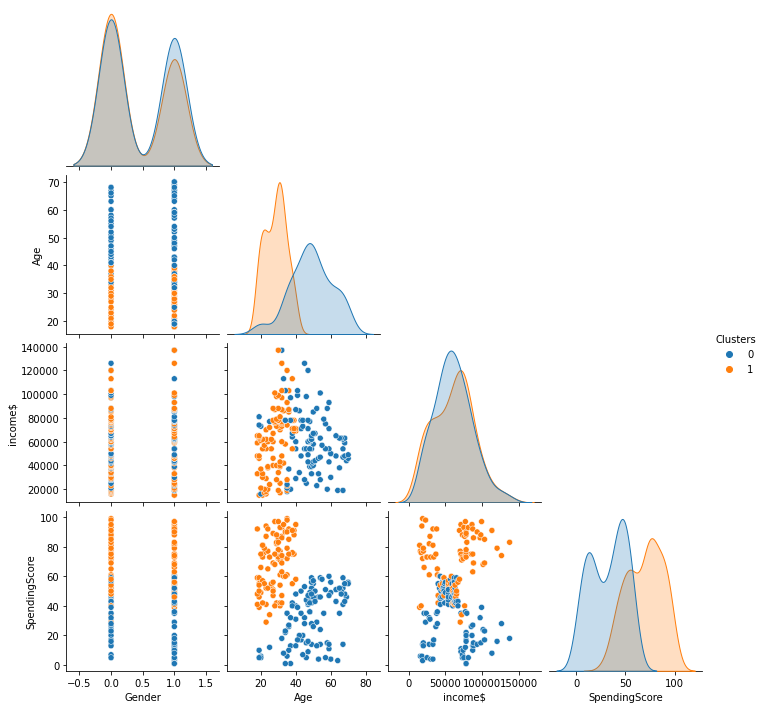

In [24]:
sns.pairplot(data=df, hue="Clusters", corner=True)

In [25]:
df.groupby("Clusters")["Gender"].value_counts()

Clusters  Gender
0         0         55
          1         48
1         0         57
          1         40
Name: Gender, dtype: int64

In [26]:
df.groupby("Clusters").describe().T

Clusters                         0              1
Gender        count     103.000000      97.000000
              mean        0.466019       0.412371
              std         0.501283       0.494819
              min         0.000000       0.000000
              25%         0.000000       0.000000
              50%         0.000000       0.000000
              75%         1.000000       1.000000
              max         1.000000       1.000000
Age           count     103.000000      97.000000
              mean       48.728155      28.360825
              std        11.931335       6.113826
              min        19.000000      18.000000
              25%        41.000000      23.000000
              50%        49.000000      29.000000
              75%        57.500000      32.000000
              max        70.000000      40.000000
income$       count     103.000000      97.000000
              mean    60495.145631   60628.865979
              std     25217.436306   27464.492071
              min     16000.000000   15000.000000
              25%     43500.000000   39000.000000
              50%     60000.000000   62000.000000
              75%     77500.000000   78000.000000
              max    137000.000000  137000.000000
SpendingScore count     103.000000      97.000000
              mean       32.184466      69.329897
              std        17.954598      17.939552
              min         1.000000      29.000000
              25%        15.000000      55.000000
              50%        35.000000      73.000000
              75%        48.000000      85.000000
              max        60.000000      99.000000

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [27]:
df1 = df[["Age", "SpendingScore"]]

#### *ii. Determine optimal number of clusters*

In [28]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)
X = df_scaled

In [29]:
ssd = []  # sum squared distance

K = range(2,10)  # Aralık verdik deniyoruz

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_) # intertia: Distance from each sample to centroid of its cluster
    
# Her k için inertiaları hesaplayacak ssd listesine atacak

Text(0.5, 1.0, 'elbow method')

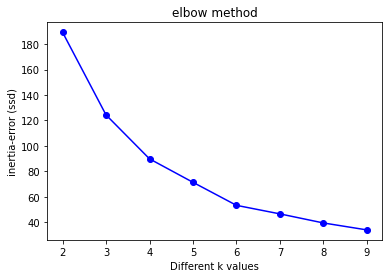

In [30]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method")

# Genelde bu elbow oluşuyor. 3 mü seçmeliyiz 4 mü ? Inceleme yaparak karar vereceğiz

In [31]:
silhouette_score(X, K_means_model.labels_)

0.47212716430695223

In [32]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
    
# 1'e ne kadar yakınsa o kadar kümelemeye elverişli
# Küme içi ve kümeler arası uzaklık


For n_clusters=2, the silhouette score is 0.47212716430695223
For n_clusters=3, the silhouette score is 0.4395299000230284
For n_clusters=4, the silhouette score is 0.4383860846564479
For n_clusters=5, the silhouette score is 0.4475485887887892
For n_clusters=6, the silhouette score is 0.4531637132878646
For n_clusters=7, the silhouette score is 0.4005396447043195
For n_clusters=8, the silhouette score is 0.4138741299279621


#### *iii. Apply K Means*

In [33]:
K_means_model.fit_predict(X)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [34]:
df1["Clusters"] = K_means_model.labels_
df1

,Age,SpendingScore,Clusters
0,19,39,1
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,1
...,...,...,...
195,35,79,1
196,45,28,0
197,32,74,1
198,32,18,0


#### *iv. Visualizing and Labeling All the Clusters*

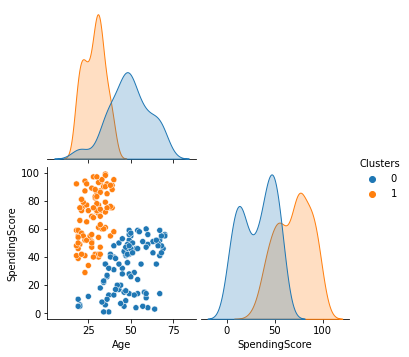

In [35]:
sns.pairplot(data=df1, hue="Clusters", corner=True);

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [36]:
df2 = df[["income$", "SpendingScore"]]

#### *ii. Apply K Means*

In [37]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)
X = df_scaled

In [38]:
K_means_model.fit_predict(X)
df2["Clusters"] = K_means_model.labels_
df2

,income$,SpendingScore,Clusters
0,15000,39,0
1,15000,81,0
2,16000,6,1
3,16000,77,0
4,17000,40,0
...,...,...,...
195,120000,79,0
196,126000,28,1
197,126000,74,0
198,137000,18,1


#### *iv. Visualizing and Labeling All the Clusters*

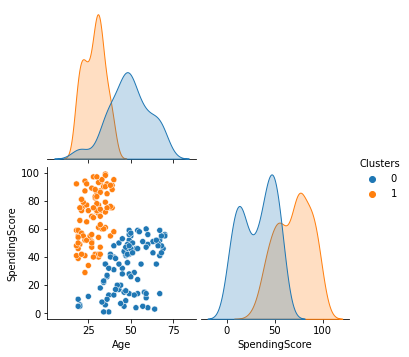

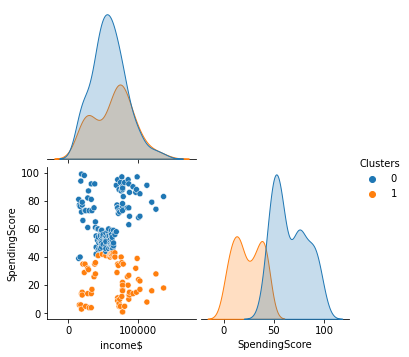

In [39]:
sns.pairplot(data=df1, hue="Clusters", corner=True)
sns.pairplot(data=df2, hue="Clusters", corner=True);

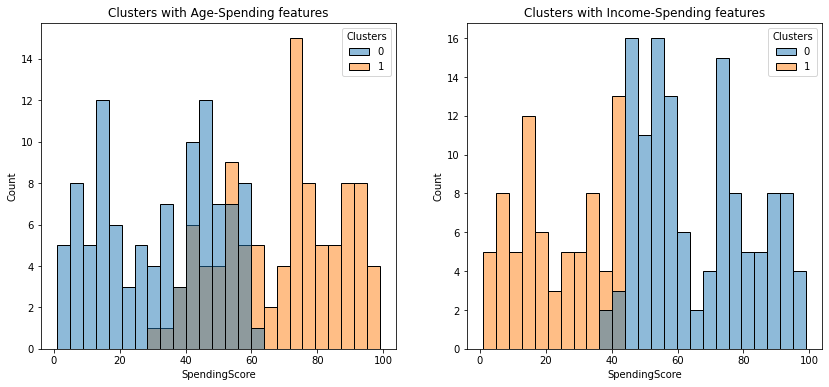

In [40]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.histplot(data=df1, x="SpendingScore", hue="Clusters", bins=25).set_title("Clusters with Age-Spending features")
plt.subplot(122)
sns.histplot(data=df2, x="SpendingScore", hue="Clusters", bins=25).set_title("Clusters with Income-Spending features");

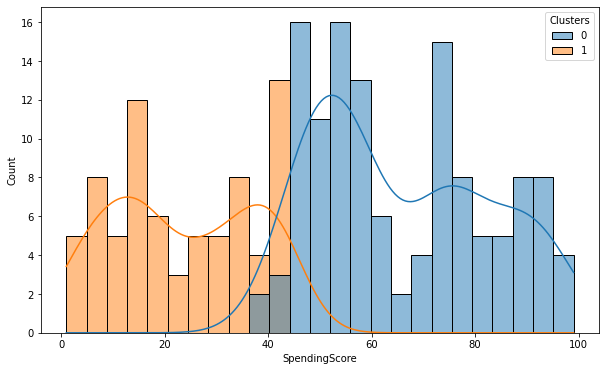

In [132]:
sns.histplot(data=df2, x="SpendingScore", hue="Clusters", bins=25, kde=True);

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

## Clustering based on Annual Income and Spending Score- x2

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.